In [21]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = - np.pi
b = np.pi


def u(x):
    return np.sin(x * 2 * np.pi / (b - a))


def f(x):
    return ((2 * np.pi / (b - a)) ** 2 + 1) * np.sin(x * 2 * np.pi / (b - a))


In [22]:
# Parameters
d = 1
k = 1
delta = 2.
N = 100

# Computed Parameters
phi = rad.phi_factory(d, k)
centres = np.linspace(a, b, N)
integrator = rad.integrate.TrapezoidIntegrator(a, b, 3000)
error_integrator = rad.integrate.LeggaussIntegrator(a, b, 500)

# Solve for approximate solution
approx, data = rad.helmholtz.solve(f, centres, delta, phi, integrator)
error = rad.error(u, approx, error_integrator)
cond = data[0]

print("L2 Relative Error:", error)
print("Condition Number:", cond)

L2 Relative Error: 0.2009364198186895
Condition Number: 489970.641340223


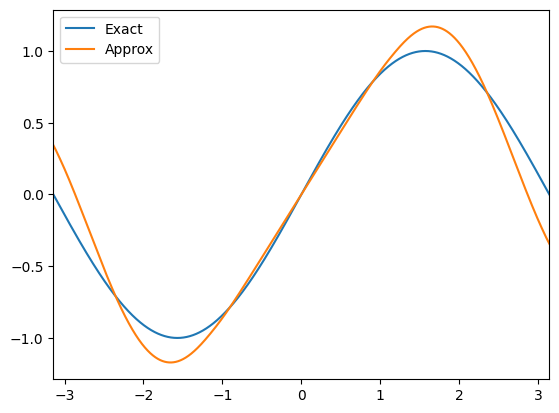

In [23]:
rad.plot.many(a, b, u, approx, labels=["Exact", "Approx"])